DECISION TREE - STUDENT PASS/FAIL

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('student_exam_tree.csv')
df

,hours_studied,sleep_hours,attendance,pass_fail
0,6.82,4.1,63.8,1
1,0.54,5.7,77.7,1
2,2.20,7.3,76.9,1
3,1.84,5.3,71.6,0
4,1.76,7.3,67.7,0
...,...,...,...,...
145,7.85,6.2,82.0,1
146,8.95,5.5,92.7,1
147,4.61,8.4,94.0,1
148,0.38,5.8,63.7,0


In [3]:
print(df.shape)
print(df.columns.tolist())
print(df.dtypes)

(150, 4)
['hours_studied', 'sleep_hours', 'attendance', 'pass_fail']
hours_studied    float64
sleep_hours      float64
attendance       float64
pass_fail          int64
dtype: object


In [4]:
df.isnull().sum()

hours_studied    0
sleep_hours      0
attendance       0
pass_fail        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,hours_studied,sleep_hours,attendance,pass_fail
count,150.000000,150.000000,150.000000,150.000000
mean,4.752533,6.442000,76.350667,0.740000
std,2.846990,1.481033,14.489305,0.440104
min,0.030000,4.000000,50.100000,0.000000
25%,2.305000,5.200000,65.425000,0.000000
50%,4.700000,6.250000,76.150000,1.000000
75%,7.377500,7.800000,89.175000,1.000000
max,9.820000,9.000000,99.100000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hours_studied  150 non-null    float64
 1   sleep_hours    150 non-null    float64
 2   attendance     150 non-null    float64
 3   pass_fail      150 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


In [8]:
df.nunique()

hours_studied    137
sleep_hours       48
attendance       128
pass_fail          2
dtype: int64

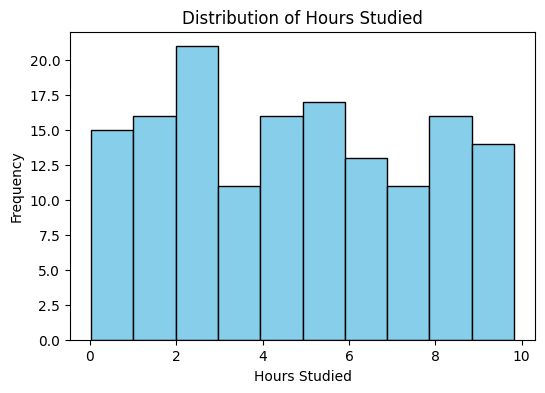

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['hours_studied'], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Hours Studied")
plt.ylabel("Frequency")
plt.title("Distribution of Hours Studied")
plt.show()

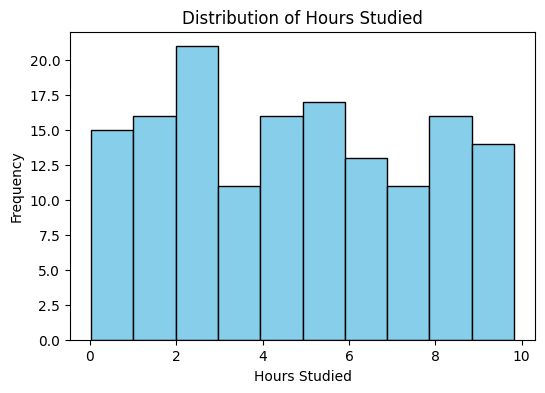

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['hours_studied'], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Hours Studied")
plt.ylabel("Frequency")
plt.title("Distribution of Hours Studied")
plt.show()

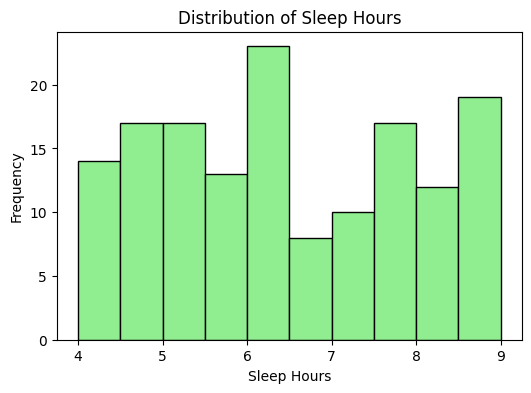

In [11]:
# Sleep Hours
plt.figure(figsize=(6,4))
plt.hist(df['sleep_hours'], bins=10, color="lightgreen", edgecolor="black")
plt.xlabel("Sleep Hours")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Hours")
plt.show()

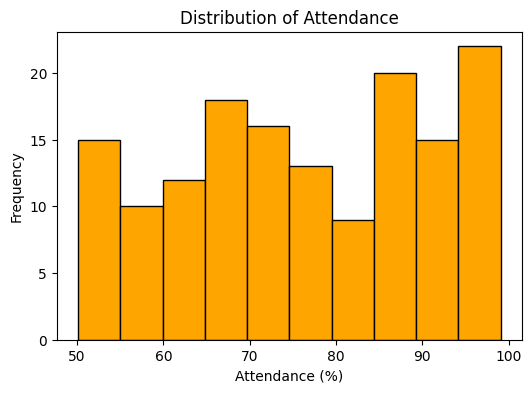

In [12]:
# Attendance
plt.figure(figsize=(6,4))
plt.hist(df['attendance'], bins=10, color="orange", edgecolor="black")
plt.xlabel("Attendance (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Attendance")
plt.show()

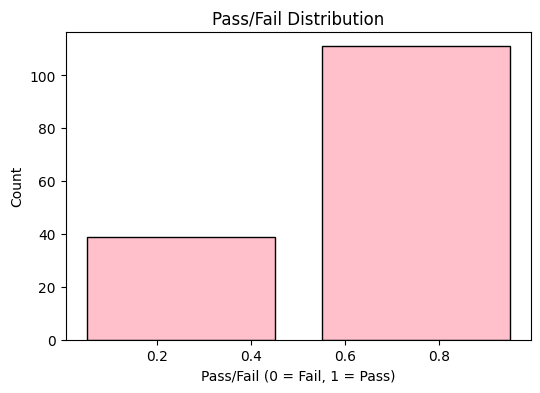

In [13]:
# Pass/Fail
plt.figure(figsize=(6,4))
plt.hist(df['pass_fail'], bins=2, color="pink", edgecolor="black", rwidth=0.8)
plt.xlabel("Pass/Fail (0 = Fail, 1 = Pass)")
plt.ylabel("Count")
plt.title("Pass/Fail Distribution")
plt.show()

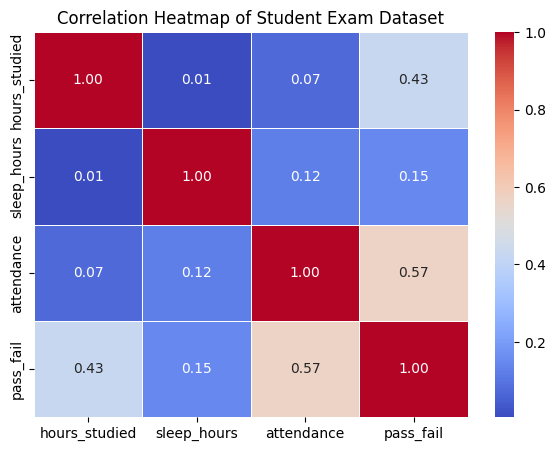

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Student Exam Dataset")
plt.show()

In [28]:
cols = ["hours_studied", "sleep_hours", "attendance"]

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"\nOutliers in {col}:\n", outliers.values)


Outliers in hours_studied:
 []

Outliers in sleep_hours:
 []

Outliers in attendance:
 []


In [38]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled,y_train)

y_pred=model.predict(X_test_scaled)

print(f'Accuracy: {accuracy_score(y_test,y_pred)}')
print(f'Precision: {precision_score(y_test,y_pred)}') 
print(f'Recall: {recall_score(y_test,y_pred)}')
print(f'f1 score: {f1_score(y_test,y_pred)}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
f1 score: 1.0


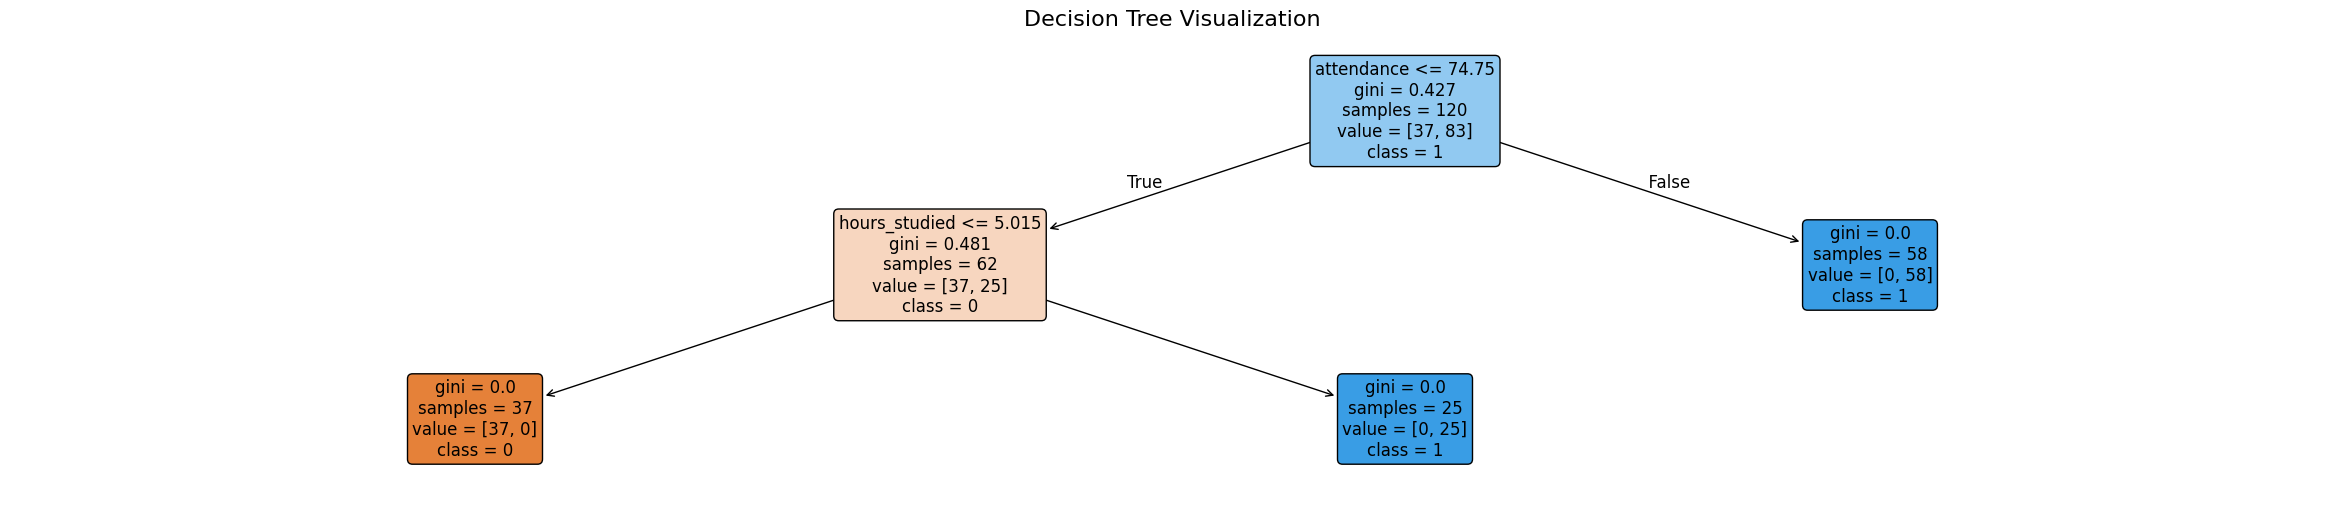

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load dataset
df = pd.read_csv("student_exam_tree.csv")

# Features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Decision Tree (limit depth to avoid overfitting)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Plot tree
plt.figure(figsize=(30, 6))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=np.unique(y).astype(str),
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.savefig("decision_tree.png")   # saves as PNG
plt.show()


In [46]:
#need to scale the input values else it results in wrong prediction
input_scaled=scaler.transform([[8,6,0.8]])
pred=model.predict(input_scaled)
if (pred[0]==1):
  print('The student is predicted to pass')
else:
  print('The student is predicted to fail')

The student is predicted to fail


e:\PYTHON\ML PROJECT 1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
e:\PYTHON\ML PROJECT 1\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [42]:
import pickle

with open('model.pkl','wb') as fp:
  pickle.dump(model,fp)

In [43]:
with open('scaler.pkl','wb') as fp:
  pickle.dump(scaler,fp)